In [46]:

import opendatasets as od


Predicting whether a customer should be given loan based on their data


GIVEN DATTASET- KAGGLE CREDIT CARD RISK DATASET

In [47]:
dataset_url = "https://www.kaggle.com/datasets/laotse/credit-risk-dataset"  # Replace with actual dataset link
od.download(dataset_url)

Skipping, found downloaded files in ".\credit-risk-dataset" (use force=True to force download)


In [48]:
import pandas as pd


file_path = r"C:\Users\titli\Downloads\archive (3)\credit_risk_dataset.csv"  # Modify if the file name is different

#dataset
df = pd.read_csv(file_path)

# Displaying first few rows
print(df.head())

# Checking dataset structure
print(df.info())

# Checking for missing values
print(df.isnull().sum())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [49]:
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")


Total Rows: 32581
Total Columns: 12


In [50]:
print("Missing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [51]:
# Selecting numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns ({len(num_cols)}): {num_cols}")
print(f"Categorical Columns ({len(cat_cols)}): {cat_cols}")


Numerical Columns (8): ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical Columns (4): ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [52]:
# Filling missing values with mean for 'person_emp_length' and 'loan_int_rate'
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

# Verifying if missing values are filled
print(df.isnull().sum())


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


C:\Users\titli\AppData\Local\Temp\ipykernel_22480\2495627677.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
C:\Users\titli\AppData\Local\Temp\ipykernel_22480\2495627677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [53]:
# Displaying unique values for each categorical column
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in categorical_columns:
    print(f"Unique categories in '{col}': {df[col].unique()}\n")


Unique categories in 'person_home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Unique categories in 'loan_intent': ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Unique categories in 'loan_grade': ['D' 'B' 'C' 'A' 'E' 'F' 'G']

Unique categories in 'cb_person_default_on_file': ['Y' 'N']



In [54]:
import pandas as pd

# loan grade mapping (A = highest, G = lowest), A-grade person should have higher chances of non default
loan_grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
df['loan_grade_encoded'] = df['loan_grade'].map(loan_grade_mapping)

# Drop original loan_grade column
df.drop(columns=['loan_grade'], inplace=True)

# One-Hot Encoding for 'person_home_ownership' and 'loan_intent' with 0 and 1
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], dtype=int)

# Displaying the first few rows
df.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,35000,16.02,1,0.59,Y,3,4,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1000,11.14,0,0.10,N,2,6,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,N,3,5,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,35000,15.23,1,0.53,N,2,5,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,35000,14.27,1,0.55,Y,4,5,0,0,0,1,0,0,0,1,0,0


In [55]:
# Remove the 'loan_status' column and copy the rest of the dataset
df_new = df.drop(columns=['loan_status']).copy()

# Display the first few rows of the copied dataset
df_new.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,35000,16.02,0.59,Y,3,4,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1000,11.14,0.10,N,2,6,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,5500,12.87,0.57,N,3,5,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,35000,15.23,0.53,N,2,5,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,35000,14.27,0.55,Y,4,5,0,0,0,1,0,0,0,1,0,0


In [56]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# List of columns to scale
columns_to_scale = ['person_income', 'person_emp_length', 'loan_amnt', 
                    'loan_int_rate', 'person_age', 'cb_person_cred_hist_length', 'loan_grade_encoded']

# Applying scaling
df_new[columns_to_scale] = scaler.fit_transform(df_new[columns_to_scale])

# the first few rows after scaling
df_new.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.016129,0.009173,1.000000,1.000000,0.595506,0.59,Y,0.035714,0.500000,0,0,0,1,0,0,0,0,1,0
1,0.008065,0.000934,0.040650,0.014493,0.321348,0.10,N,0.000000,0.833333,0,0,1,0,0,1,0,0,0,0
2,0.040323,0.000934,0.008130,0.144928,0.418539,0.57,N,0.035714,0.666667,1,0,0,0,0,0,0,1,0,0
3,0.024194,0.010257,0.032520,1.000000,0.551124,0.53,N,0.000000,0.666667,0,0,0,1,0,0,0,1,0,0
4,0.032258,0.008406,0.065041,1.000000,0.497191,0.55,Y,0.071429,0.666667,0,0,0,1,0,0,0,1,0,0


In [57]:
# Replace 'Y' with 0 and 'N' with 1 in the 'cb_person_default_on_file' column
df_new['cb_person_default_on_file'] = df_new['cb_person_default_on_file'].replace({'Y': 0, 'N': 1})

# Verify the change
print(df_new['cb_person_default_on_file'].head())


0    0
1    1
2    1
3    1
4    0
Name: cb_person_default_on_file, dtype: int64


C:\Users\titli\AppData\Local\Temp\ipykernel_22480\2781756808.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['cb_person_default_on_file'] = df_new['cb_person_default_on_file'].replace({'Y': 0, 'N': 1})


In [58]:
# original dataframe `df` with the 'loan_status' column
df_new['loan_status'] = df['loan_status']


In [59]:
df_new.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,0.016129,0.009173,1.000000,1.000000,0.595506,0.59,0,0.035714,0.500000,0,0,0,1,0,0,0,0,1,0,1
1,0.008065,0.000934,0.040650,0.014493,0.321348,0.10,1,0.000000,0.833333,0,0,1,0,0,1,0,0,0,0,0
2,0.040323,0.000934,0.008130,0.144928,0.418539,0.57,1,0.035714,0.666667,1,0,0,0,0,0,0,1,0,0,1
3,0.024194,0.010257,0.032520,1.000000,0.551124,0.53,1,0.000000,0.666667,0,0,0,1,0,0,0,1,0,0,1
4,0.032258,0.008406,0.065041,1.000000,0.497191,0.55,0,0.071429,0.666667,0,0,0,1,0,0,0,1,0,0,1


In [60]:
from sklearn.model_selection import train_test_split


X = df_new.drop(columns=['loan_status'])  # Feature matrix without 'loan_status'
y = df_new['loan_status']  # Target vector

# splitting the data into 70% training and 30% (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# splitting the remaining 30% into 20% validation and 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)  # 1/3 of 30% is 10%

# Checking the sizes of each dataset
print(f"Training Data Size: {X_train.shape[0]}")
print(f"Validation Data Size: {X_val.shape[0]}")
print(f"Test Data Size: {X_test.shape[0]}")


Training Data Size: 22806
Validation Data Size: 6516
Test Data Size: 3259


USING DECISION TREE TO CLASSIFY

MODEL1

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

#  Predicting on the validation set
y_pred = dt_classifier.predict(X_val)

#  Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 89.17%


In [62]:
y_pred1= dt_classifier.predict(X_train)

accuracy1 = accuracy_score(y_pred1, y_train)
print(accuracy1)  #model on the training data

1.0


In [63]:
y_pred2= dt_classifier.predict(X_test)

accuracy2 = accuracy_score(y_pred2, y_test)
print(f"test Accuracy: {accuracy2 * 100:.2f}%")

test Accuracy: 88.49%


HYPERPARAMETER TUNING

MODEL2

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initializig Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Training model with best parameters
best_dt = grid_search.best_estimator_

# Prediction on test set
y_val_pred = best_dt.predict(X_val)

# accuracy
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Tuned val Accuracy: {val_accuracy * 100:.2f}%")



Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned val Accuracy: 93.54%


In [65]:

y_test_pred = best_dt.predict(X_test)

# accuracy on the test set
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Tuned Test Accuracy: {test_accuracy * 100:.2f}%")


Tuned Test Accuracy: 93.16%


feature importance

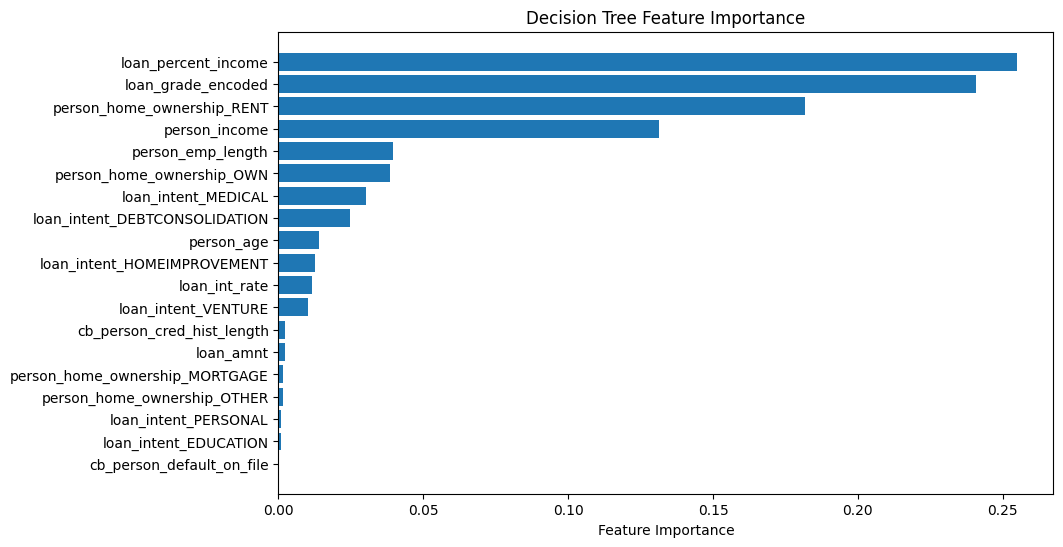

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# feature importance
feature_importance = best_dt.feature_importances_
features = X_train.columns

# plotting feature importance
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()


USING RANDOM FOREST TO CLASSIFY

MODEL3

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction on test set
y_test_prediction = rf_model.predict(X_test)
y_val_prediction = rf_model.predict(X_val)

# Evaluating accuracy
test_accuracy_random_forest = accuracy_score(y_test, y_test_prediction)
validation_acc= accuracy_score(y_val,y_val_prediction)
print(f"Random Forest Test Accuracy: {test_accuracy_random_forest * 100:.2f}%")
print(f"Random fofrest validation accuracy : {validation_acc*100:.2f}%")



Random Forest Test Accuracy: 93.22%
Random fofrest validation accuracy : 93.54%


MODEL4

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# parameter grid
param_grid1 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.02]  # NEW PARAMETER ADDED
}

# Initializing model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid1, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#best parameters
print("Best Parameters:", grid_search.best_params_)


best_rf = grid_search.best_estimator_

# Predict and evaluate
y_test_pred_ = best_rf.predict(X_test)
y_val_pred2= best_rf.predict(X_val)

from sklearn.metrics import accuracy_score
test_accuracy_= accuracy_score(y_test, y_test_pred_)
validation_accuracy2= accuracy_score(y_val,y_val_pred2)
print(f"Tuned Random Forest Test Accuracy: {test_accuracy_ * 100:.2f}%")
print(f"Tuned Random Forest Validation Accuracy: {validation_accuracy2 * 100:.2f}%")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Test Accuracy: 93.22%
Tuned Random Forest Validation Accuracy: 93.51%


CONFUSION MATRIX

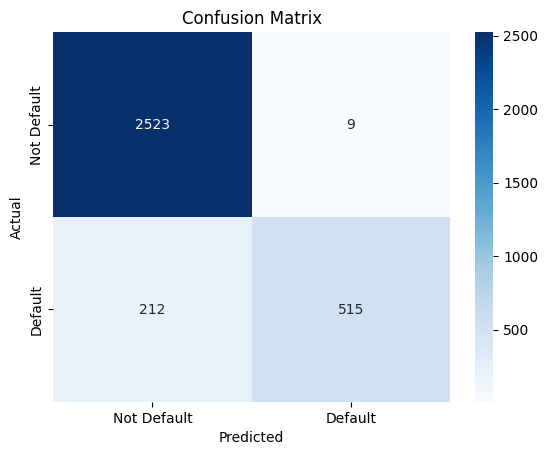

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_test_pred_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


HERE WE HAVE RELATIVELY HIGH FP, SO WE ARE CHANGING THE HYPER PARAMETER SCORING

MODEL5

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# parameter grid
param_grid1 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.02]  # NEW PARAMETER ADDED
}

# Initializing model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid1, cv=5, scoring='precision', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#best parameters
print("Best Parameters:", grid_search.best_params_)


best_rf = grid_search.best_estimator_

# Predict and evaluate
y_test_pred_ = best_rf.predict(X_test)
y_val_pred2= best_rf.predict(X_val)

from sklearn.metrics import accuracy_score
test_accuracy_= accuracy_score(y_test, y_test_pred_)
validation_accuracy2= accuracy_score(y_val,y_val_pred2)
print(f"Tuned Random Forest Test Accuracy: {test_accuracy_ * 100:.2f}%")
print(f"Tuned Random Forest Validation Accuracy: {validation_accuracy2 * 100:.2f}%")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Test Accuracy: 80.27%
Tuned Random Forest Validation Accuracy: 80.74%


CLEARLY, OUR BEST MODEL IS MODEL4 , WITH 93% ACCURACY (ALMOST)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}